In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initial Data Exploration

In [2]:
# read training data
raw_train_df = pd.read_csv(r'./datasrc/train.csv')
print(raw_train_df.shape)
print(raw_train_df.groupby(['YrSold'])['MoSold'].agg(['min', 'max', 'count']))

raw_test_df = pd.read_csv(f'./datasrc/test.csv')
print(raw_test_df.shape)
print(raw_test_df.groupby(['YrSold'])['MoSold'].agg(['min', 'max', 'count']))

(1460, 81)
        min  max  count
YrSold                 
2006      1   12    314
2007      1   12    329
2008      1   12    304
2009      1   12    338
2010      1    7    175
(1459, 80)
        min  max  count
YrSold                 
2006      1   12    305
2007      1   12    363
2008      1   12    318
2009      1   12    309
2010      1    7    164


since the time period for both training and testing datasets are spread evenly, we will NOT perform any timeseries analysis to predict future housing prices

In [3]:
# describe the dataset
raw_train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


we can observe some missing values in LotFrontage; we will deep dive for missing values further

In [4]:
# check for correlation between sales and other features
raw_train_df.corr()["SalePrice"].sort_values(ascending = False)[1:]

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

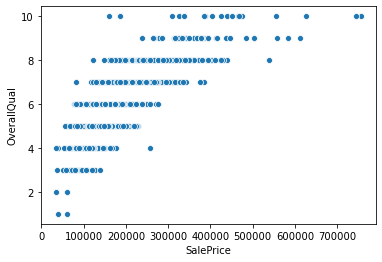

In [5]:
sns.scatterplot(raw_train_df['SalePrice'], raw_train_df['OverallQual'])

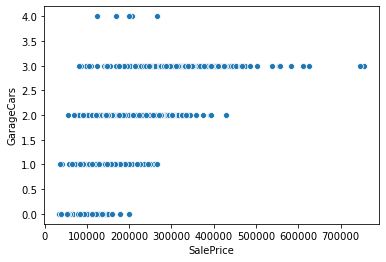

In [6]:
sns.scatterplot(raw_train_df['SalePrice'], raw_train_df['GarageCars'])

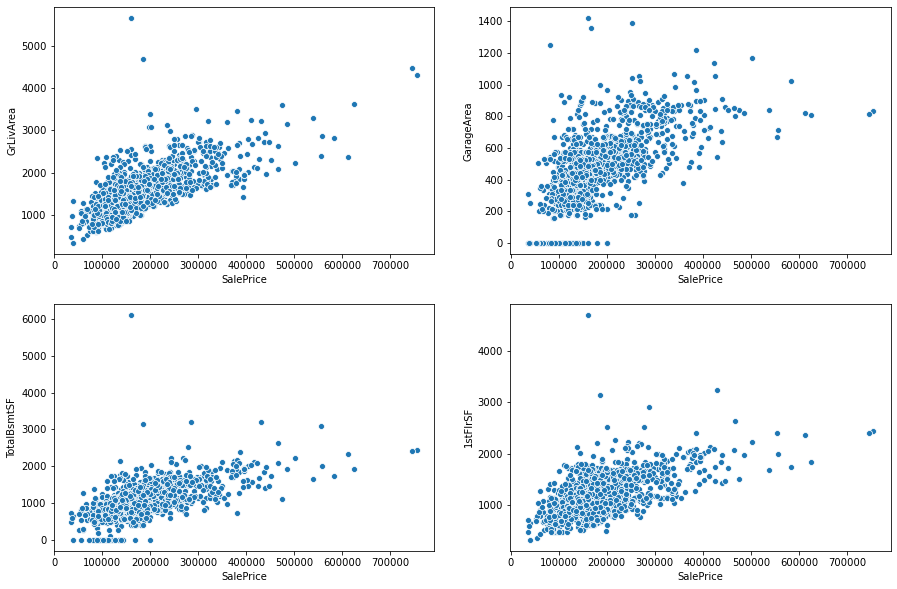

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize = (15,10), ncols=2, nrows=2, sharey=False)
sns.scatterplot(raw_train_df['SalePrice'], raw_train_df['GrLivArea'], ax=ax1)
sns.scatterplot(raw_train_df['SalePrice'], raw_train_df['GarageArea'], ax=ax2)
sns.scatterplot(raw_train_df['SalePrice'], raw_train_df['TotalBsmtSF'], ax=ax3)
sns.scatterplot(raw_train_df['SalePrice'], raw_train_df['1stFlrSF'], ax=ax4)


Notice the outliers in the plots. Also there is a pattern in the sctterplot for almost all the area variables

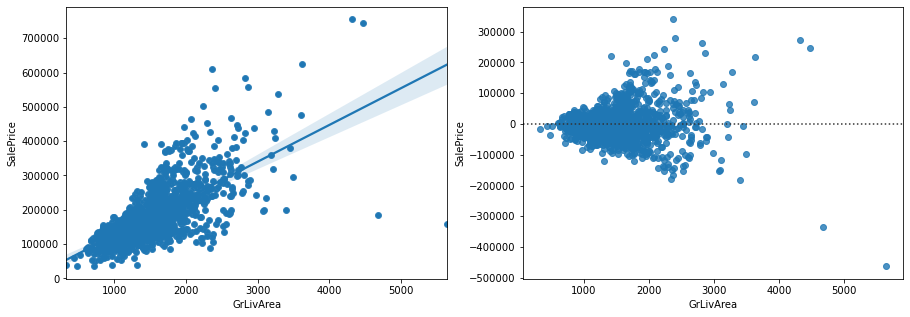

In [8]:
# check for linearity

fig, (ax1, ax2) = plt.subplots(figsize = (15,5), ncols=2,sharey=False)

## Scatter plotting for SalePrice and GrLivArea. 
sns.scatterplot( x = raw_train_df['GrLivArea'], y = raw_train_df['SalePrice'], ax=ax1)
## Putting a regression line. 
sns.regplot(x=raw_train_df['GrLivArea'], y=raw_train_df['SalePrice'], ax=ax1)

# plot residuals
sns.residplot(raw_train_df['GrLivArea'], raw_train_df['SalePrice'], ax=ax2)

even though there seems to be a nice linear fit between sales and liv area, the residuals show that as the area increases, the variance also increses.
Ideally the residuals plot should be random, but here we can see a funnel shape.

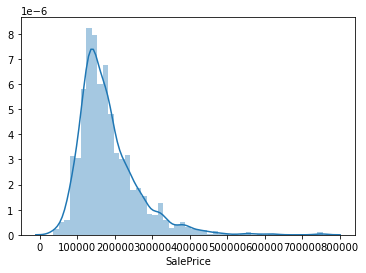

In [9]:
sns.distplot(raw_train_df['SalePrice']);

Sales price is skewed left; we should transform the variable to create a normal distribution

# Data cleaning and feature engineering

### missing values

In [10]:
# get columns with null values if any
cols_with_missing = [col for col in raw_train_df.columns if raw_train_df[col].isnull().any()]
for col in cols_with_missing:
    missing_val_ct = raw_train_df.loc[raw_train_df[col].isnull(), col].shape[0]
    print(f"{col} === {missing_val_ct/1451*100}")

LotFrontage === 17.849758787043417
Alley === 94.3487250172295
MasVnrType === 0.5513439007580978
MasVnrArea === 0.5513439007580978
BsmtQual === 2.5499655410062028
BsmtCond === 2.5499655410062028
BsmtExposure === 2.6188835286009646
BsmtFinType1 === 2.5499655410062028
BsmtFinType2 === 2.6188835286009646
Electrical === 0.06891798759476223
FireplaceQu === 47.55341144038594
GarageType === 5.582356995175741
GarageYrBlt === 5.582356995175741
GarageFinish === 5.582356995175741
GarageQual === 5.582356995175741
GarageCond === 5.582356995175741
PoolQC === 100.13783597518953
Fence === 81.25430737422468
MiscFeature === 96.8986905582357


In [11]:
# handle missing values for categorical variables
def fill_missing_values(df):
    # for columns Alley, PoolQC, Fenc and MiscFeature
    # a null value indicates no feature 
    # for example when Fence is null it indicates no fence
    # when MiscFeature is null, it indicates no misc feature
    df = df.copy()
    
    df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna('NoBasement', axis=1)
    
    # handle missing values for garage
    df[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = df[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna('NoGarage', axis=1)
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
    
    # handle missing masonary veneer type
    df['MasVnrType'] = df['MasVnrType'].fillna('NoMasVnrType')
    df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
    
    # handle rest of object columns
    for col in ['MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'Alley']:
        df[col] = df.fillna(f"No{col}")
        
    df['Electrical'] = df['Electrical'].fillna('NotKnown')
    
    return df

In [12]:
# handle missing values for numerical columns
from sklearn.impute import KNNImputer

# impute missing values with knn algorithm
def fill_missing_numerical_cols(df):
    df = df.copy()
    q = KNNImputer(missing_values = np.nan, n_neighbors=20, weights='uniform')
    df['LotFrontage'] = q.fit_transform(df['LotFrontage'].astype(float).values.reshape(-1, 1))
    
    return df

In [13]:
raw_train_df = fill_missing_values(raw_train_df)
raw_train_df = fill_missing_numerical_cols(raw_train_df)

In [14]:
raw_train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,1,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,1,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,1,1,1,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,2,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,2,2,2,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,3,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,3,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,3,3,3,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,4,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,4,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,4,4,4,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,5,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,5,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,5,5,5,0,12,2008,WD,Normal,250000


## correct dtypes

In [15]:
raw_train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [16]:
# convert numeric categories to actual category type
raw_train_df[['MSSubClass', 'OverallQual', 'OverallCond']] = raw_train_df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('category')

## handle outliers

In [17]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

def handle_outliers(df):
    df = df.copy()
    
    outhandle = LocalOutlierFactor(n_neighbors=80)

    for col in ['SalePrice', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']:
        df["outlier"] = outhandle.fit_predict(df[col].astype(int).values.reshape(-1, 1))
        df = df.loc[df['outlier'] != -1]
    
    df.drop("outlier", inplace=True, axis=1)  
    return df

In [18]:
raw_train_df = handle_outliers(raw_train_df)

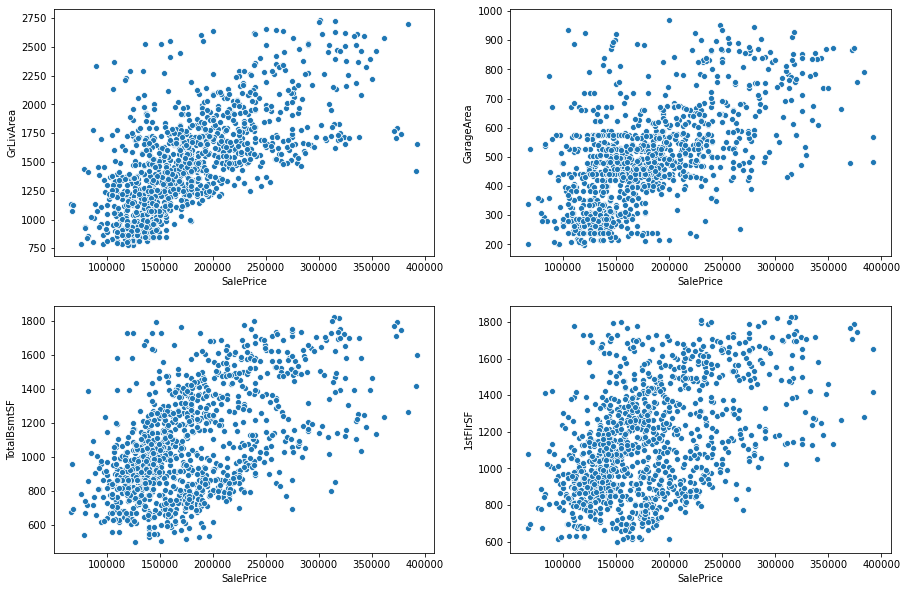

In [19]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize = (15,10), ncols=2, nrows=2, sharey=False)
sns.scatterplot(raw_train_df['SalePrice'], raw_train_df['GrLivArea'], ax=ax1)
sns.scatterplot(raw_train_df['SalePrice'], raw_train_df['GarageArea'], ax=ax2)
sns.scatterplot(raw_train_df['SalePrice'], raw_train_df['TotalBsmtSF'], ax=ax3)
sns.scatterplot(raw_train_df['SalePrice'], raw_train_df['1stFlrSF'], ax=ax4)

In [20]:
# manually remove one additonal outlier value
#raw_train_df = raw_train_df.loc[raw_train_df['GrLivArea'] <= 5000]
#raw_train_df = raw_train_df.loc[raw_train_df['SalePrice'] <= 500000]
raw_train_df.shape

(1157, 81)

# column transform

In [21]:
raw_train_df.drop(['Id'], inplace=True, axis=1)
raw_train_df['SalePrice'] = np.log(raw_train_df['SalePrice'])

## column encoder

In [22]:
from sklearn.preprocessing import LabelEncoder

def perform_label_encoding(df):
    df = df.copy()
    
    object_columns =  list(df.select_dtypes(include=['object', 'category']).columns)
    print(object_columns)
    
    for col in object_columns:
        en = LabelEncoder()
        encode_data = en.fit_transform(df[col])
        df[col] = encode_data
    
    return df

In [23]:
raw_train_df = perform_label_encoding(raw_train_df)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [24]:
raw_train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,65.0,8450,1,0,3,3,0,4,0,5,2,2,0,5,4,3,2003,2003,1,0,10,13,1,196.0,2,3,2,2,3,3,2,706,5,0,150,856,0,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,5,0,0,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,0,0,0,0,2,2008,8,4,12.247694
1,0,3,80.0,9600,1,1,3,3,0,2,0,24,1,2,0,2,3,6,1976,1976,1,0,6,8,3,0.0,3,3,1,2,3,1,0,978,5,0,284,1262,0,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,5,1,1,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,1,1,1,0,5,2007,8,4,12.109011
2,5,3,68.0,11250,1,2,0,3,0,4,0,5,2,2,0,5,4,3,2001,2002,1,0,10,13,1,162.0,2,3,2,2,3,2,2,486,5,0,434,920,0,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,5,1,2,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,2,2,2,0,9,2008,8,4,12.317167
3,6,3,60.0,9550,1,3,0,3,0,0,0,6,2,2,0,5,4,3,1915,1970,1,0,11,15,3,0.0,3,3,0,3,1,3,0,216,5,0,540,756,0,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,5,1,3,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,3,3,3,0,2,2006,8,0,11.849398
4,5,3,84.0,14260,1,4,0,3,0,2,0,15,2,2,0,5,5,3,2000,2000,1,0,10,13,1,350.0,2,3,2,2,3,0,2,655,5,0,490,1145,0,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,5,1,4,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,4,4,4,0,12,2008,8,4,12.429216


# Fit initial models

### Linear regression

In [25]:
from sklearn.model_selection import train_test_split

#raw_train_df.drop(['Id'], axis=1, inplace=True)
X = raw_train_df.drop(['SalePrice'], axis=1)
y = raw_train_df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression
l1 = LinearRegression(n_jobs=-1, normalize=True)
l1.fit(X_train, y_train)
l1.score(X_test, y_test)

0.8610598150521093

In [27]:
from sklearn.metrics import mean_squared_error
predictions = l1.predict(X_test)
mean_squared_error(y_test,predictions)

0.013686482835475425

### Feature Importances - linear regression

In [28]:
importance = l1.coef_
imp_series = pd.Series(importance, index=X_train.columns).sort_values(ascending=False)[:25]
imp_series

Alley            3.964543e+08
1stFlrSF         2.478002e+08
2ndFlrSF         2.478002e+08
LowQualFinSF     2.478002e+08
TotalBsmtSF      1.486653e+06
Street           1.819580e-01
CentralAir       6.324859e-02
OverallQual      5.188728e-02
GarageCars       3.418426e-02
OverallCond      3.258304e-02
Functional       2.348170e-02
Condition2       2.146546e-02
Fireplaces       1.984799e-02
BsmtCond         1.590601e-02
SaleCondition    1.589400e-02
Foundation       1.434423e-02
GarageQual       1.369670e-02
FullBath         1.343735e-02
BsmtFullBath     1.106133e-02
MasVnrType       7.800811e-03
Exterior2nd      6.679092e-03
HouseStyle       6.035477e-03
RoofStyle        4.653518e-03
TotRmsAbvGrd     2.578253e-03
Condition1       2.497137e-03
dtype: float64

### Lasso regression

In [29]:
from sklearn.linear_model import Lasso

for i in [1e-15, 1e-10, 1e-8,1e-5,1e-4, 1e-3,1e-2,0.5,1,1.5, 2]:
    lass = Lasso(alpha = i, max_iter=500)
    lass.fit(X_train, y_train)
    #print(lass.score(X_test, y_test))
    predictions = lass.predict(X_test)
    print(f"{i} : {mean_squared_error(y_test,predictions)}")

1e-15 : 0.013681874800565121
1e-10 : 0.013681874785019086
1e-08 : 0.013681873245851477
1e-05 : 0.013680383466504532
0.0001 : 0.013666752501964847
0.001 : 0.013419710627283298
0.01 : 0.016150185170513358
0.5 : 0.02693464194826953
1 : 0.030406186880541943
1.5 : 0.034000944488771584
2 : 0.03747914396369277


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.542407578124006, tolerance: 0.008684966303228046
  model = cd_fast.enet_coordinate_descent(


lasso regression with alpha as 1e-3 or 0.001 gives the best score

## Ridge regression

In [30]:
from sklearn.linear_model import Ridge

for i in [1e-15, 1e-10, 1e-8,1e-5,1e-4, 1e-3,1e-2,0.5,1,1.5, 2]:
    ridge = Ridge(alpha = i, normalize=True)
    ridge.fit(X_train, y_train)
    #print(ridge.score(X_test, y_test))
    predictions = ridge.predict(X_test)
    print(mean_squared_error(y_test,predictions))

0.013681874800565218
0.013681874800598475
0.013681874803882959
0.013681878122783308
0.013681908430596804
0.013682251250307033
0.013689105083711673
0.015155568949282529
0.0167339577096739
0.018275223186289536
0.01980110579113171


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.91816e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


# check feature importances

In [31]:
imp = lass.coef_
imp_series = pd.Series(imp, index=X_train.columns).sort_values(ascending=False)[:15]
imp_series

YearBuilt      0.001004
TotalBsmtSF    0.000335
GarageArea     0.000318
GrLivArea      0.000295
2ndFlrSF       0.000091
BsmtFinSF1     0.000087
WoodDeckSF     0.000059
MiscVal        0.000004
LotArea        0.000001
MasVnrArea     0.000001
ExterQual     -0.000000
RoofMatl       0.000000
Exterior1st    0.000000
Exterior2nd    0.000000
MasVnrType     0.000000
dtype: float64

The highest importances are allocated to GrLivArea, TotalBsmtSF, LotArea

# Feature engineering - II

In [32]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data = sc.fit_transform(raw_train_df)
scaled_df = pd.DataFrame(data, columns=raw_train_df.columns)

In [33]:
#raw_train_df.drop(['Id'], axis=1, inplace=True)
X = raw_train_df.drop(['SalePrice'], axis=1)
y = raw_train_df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [34]:
from sklearn.linear_model import Lasso


lass = Lasso(alpha = 0.001, max_iter=500)
lass.fit(X_train, y_train)
predictions = lass.predict(X_test)
print(mean_squared_error(y_test,predictions))

0.013419710627283298


Hence we select lasso regression as our final model